### colab runtime 변경
- 코랩 런타임을 T4 GPU로 변경해주세요.
- 무료 버전 코랩을 사용할 경우, 하루 할당된 GPU가 제한되어 있어서 학습을 진행하다가 런타임이 끊길 수 있습니다.
- 로컬에 파이썬 설치가 가능하다면 로컬에서 진행하는 것을 추천드립니다.
- 로컬에서 진행할 경우엔 conda를 활용하여 가상환경을 세팅해주세요.

### mount google drive
- 코랩을 활용할 경우, 구글 드라이브에 있는 데이터를 사용하기 위해서 마운트 작업이 필요합니다.
- 로컬에서 진행할 경우엔 생략해주세요.

In [36]:
!git add "/Users/tasha/Desktop/comento/mywork/notebooks/02_yolo_모델_학습_코드.ipynb"
!git commit -m "done) hyperparmeter tunning" 
!git push origin main

[main 10e75d5] done) hyperparmeter tunning
 1 file changed, 12695 insertions(+)
 create mode 100644 notebooks/02_yolo_모델_학습_코드.ipynb
오브젝트 나열하는 중: 6, 완료.
오브젝트 개수 세는 중: 100% (6/6), 완료.
Delta compression using up to 8 threads
오브젝트 압축하는 중: 100% (4/4), 완료.
오브젝트 쓰는 중: 100% (4/4), 77.80 KiB | 3.38 MiB/s, 완료.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/tashapark/cctv_object_detection.git
   39e1efd..10e75d5  main -> main


In [33]:
# 파일 명 변경시.. 걍 업데이트로 하자 
! git add -u 
! git commit -m "Rename notebook files"
! git push origin main

[main 39e1efd] Rename notebook files
 1 file changed, 5 insertions(+), 6 deletions(-)
오브젝트 나열하는 중: 7, 완료.
오브젝트 개수 세는 중: 100% (7/7), 완료.
Delta compression using up to 8 threads
오브젝트 압축하는 중: 100% (4/4), 완료.
오브젝트 쓰는 중: 100% (4/4), 495 bytes | 495.00 KiB/s, 완료.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/tashapark/cctv_object_detection.git
   214b166..39e1efd  main -> main


### Import Libraray

In [73]:
import os
import cv2
import glob
import shutil
import warnings
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

In [2]:
#!pip install --upgrade jupyter ipywidgets

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
# 현재 실행 파일 경로 확인
os.getcwd()

'/Users/tasha/Desktop/comento/mywork'

### yolov5s 모델 설치 및 환경 설정

- 모델을 설치할 경로에 cd 명령어를 활용하여 들어가주세요

In [5]:
# 폴더 생성
#!mkdir -p /Users/tasha/Desktop/comento/mywork/models
!mkdir -p /Users/tasha/Desktop/comento/mywork/models/yolov5
!mkdir -p /Users/tasha/Desktop/comento/mywork/models/yolov8
!mkdir -p /Users/tasha/Desktop/comento/mywork/models/yolov11

#git ignore 추가 
#!echo "models/" >> /Users/tasha/Desktop/comento/mywork/.gitignore

In [6]:
cd /Users/tasha/Desktop/comento/mywork/models/yolov5

/Users/tasha/Desktop/comento/mywork/models/yolov5


In [7]:
# 현재 파일 경로 확인 (원하는 경로에 들어와있는지 확인)
os.getcwd()

'/Users/tasha/Desktop/comento/mywork/models/yolov5'

In [8]:
# git clone을 통해 yolov5s 모델 설치
!git clone https://github.com/ultralytics/yolov5.git

fatal: 대상 경로가('yolov5') 이미 있고 빈 디렉터리가 아닙니다.


### yolov5s 전이학습
- 전이학습을 진행할 때 사용되는 batch와 epoch에 대해서 정의도 같이 공부하면 좋을 것 같습니다.
- 전이학습 후에 나오는 최종모델파일은 마지막줄에 출력되는 "Results saved to yolov5/runs/train/yolov5s_results" 에 저장됩니다.

In [ ]:
#!pip install --upgrade Pillow
#!pip install torch torchvision torchaudio 
#!pip install pandas
#!pip install numpy==2.1.1 # yolov5s에 맞춤
#!pip install --upgrade scipy
#!pip install --upgrade seaborn
#!pip install tensorboard
#!pip install tensorflow
#!pip install wandb

In [55]:
import torch
print(torch.__version__)  # PyTorch 버전 확인
# MPS는 M1 GPU에서 Metal API를 사용하는 PyTorch 백엔드입니다.
print(torch.backends.mps.is_available())  # M1 GPU(Metal)가 사용 가능한지 확인

#torch는 gpu를 기본값으로 쓰도록 설정 
device = torch.device("mps")

2.6.0
True


In [30]:
#캐시 비우기
#!rm -f /Users/tasha/Desktop/comento/dataset/datasets/labels/train.cache

In [74]:
# 완드 
import wandb
wandb.login(key="104e72e71dd69b644852d315a760589455fe70db")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

#### 하이퍼파라미터 튜닝) 배치 20, 에폭 10

In [21]:
import timeit
start = timeit.default_timer()

# 배치 20, 에폭 10
!python yolov5/train.py --img 224 --batch 20 --epochs 10 --data /Users/tasha/Desktop/comento/dataset/datasets/data.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results 

end = timeit.default_timer()
print(end-start)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: pdy2564 (pdy2564-job-applicants) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=20, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_i

#### 하이퍼파라미터 튜닝) 배치 32, 에폭 10

In [24]:
import timeit
start = timeit.default_timer()

#배치 사이즈가 16, 32, 64 정도에서 잘 작동
# 배치 32 시도, early stopping 5에폭 이상 향상이 없으면.
!python yolov5/train.py --img 224 --batch 32 --epochs 10 --data /Users/tasha/Desktop/comento/dataset/datasets/data.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_batch32_epoch10 --patience 5

end = timeit.default_timer()
print(end-start)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: pdy2564 (pdy2564-job-applicants) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_batch32_epoch10, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, 

#### 하이퍼파라미터 튜닝) 배치 64, 에폭 10
- 성능의 큰 차이는 없는데 시간이 확실히 줄어서 배치를 늘리는 쪽으로!

In [25]:
import timeit
start = timeit.default_timer()

# 배치 64, 에폭 10
!python yolov5/train.py --img 224 --batch 64 --epochs 10 --data /Users/tasha/Desktop/comento/dataset/datasets/data.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_batch64_epoch10 --patience 5

end = timeit.default_timer()
print(end-start)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: pdy2564 (pdy2564-job-applicants) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=64, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_batch64_epoch10, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, 

#### 하이퍼파라미터 튜닝) 배치 128, 에폭 10
- 시간이 길어지는 것에 비해 성능이 떨어짐.. 배치 줄임. 

In [26]:
import timeit
start = timeit.default_timer()

# 배치 128, 에폭 10 --> 시도 해보고 영 아니면 에폭을 높여서.. => 비효율적
!python yolov5/train.py --img 224 --batch 128 --epochs 10 --data /Users/tasha/Desktop/comento/dataset/datasets/data.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_batch128_epoch10 --patience 5

end = timeit.default_timer()
print(end-start)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: pdy2564 (pdy2564-job-applicants) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=128, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_batch128_epoch10, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False

#### 하이퍼파라미터 튜닝) 배치 64, 에폭 15
- 성능은 상승하나 2.691 h 시간이 너무 오래 걸리고 상승폭이 0.002 미만이라서 mAP@0.5:0.95 = 0.9673
  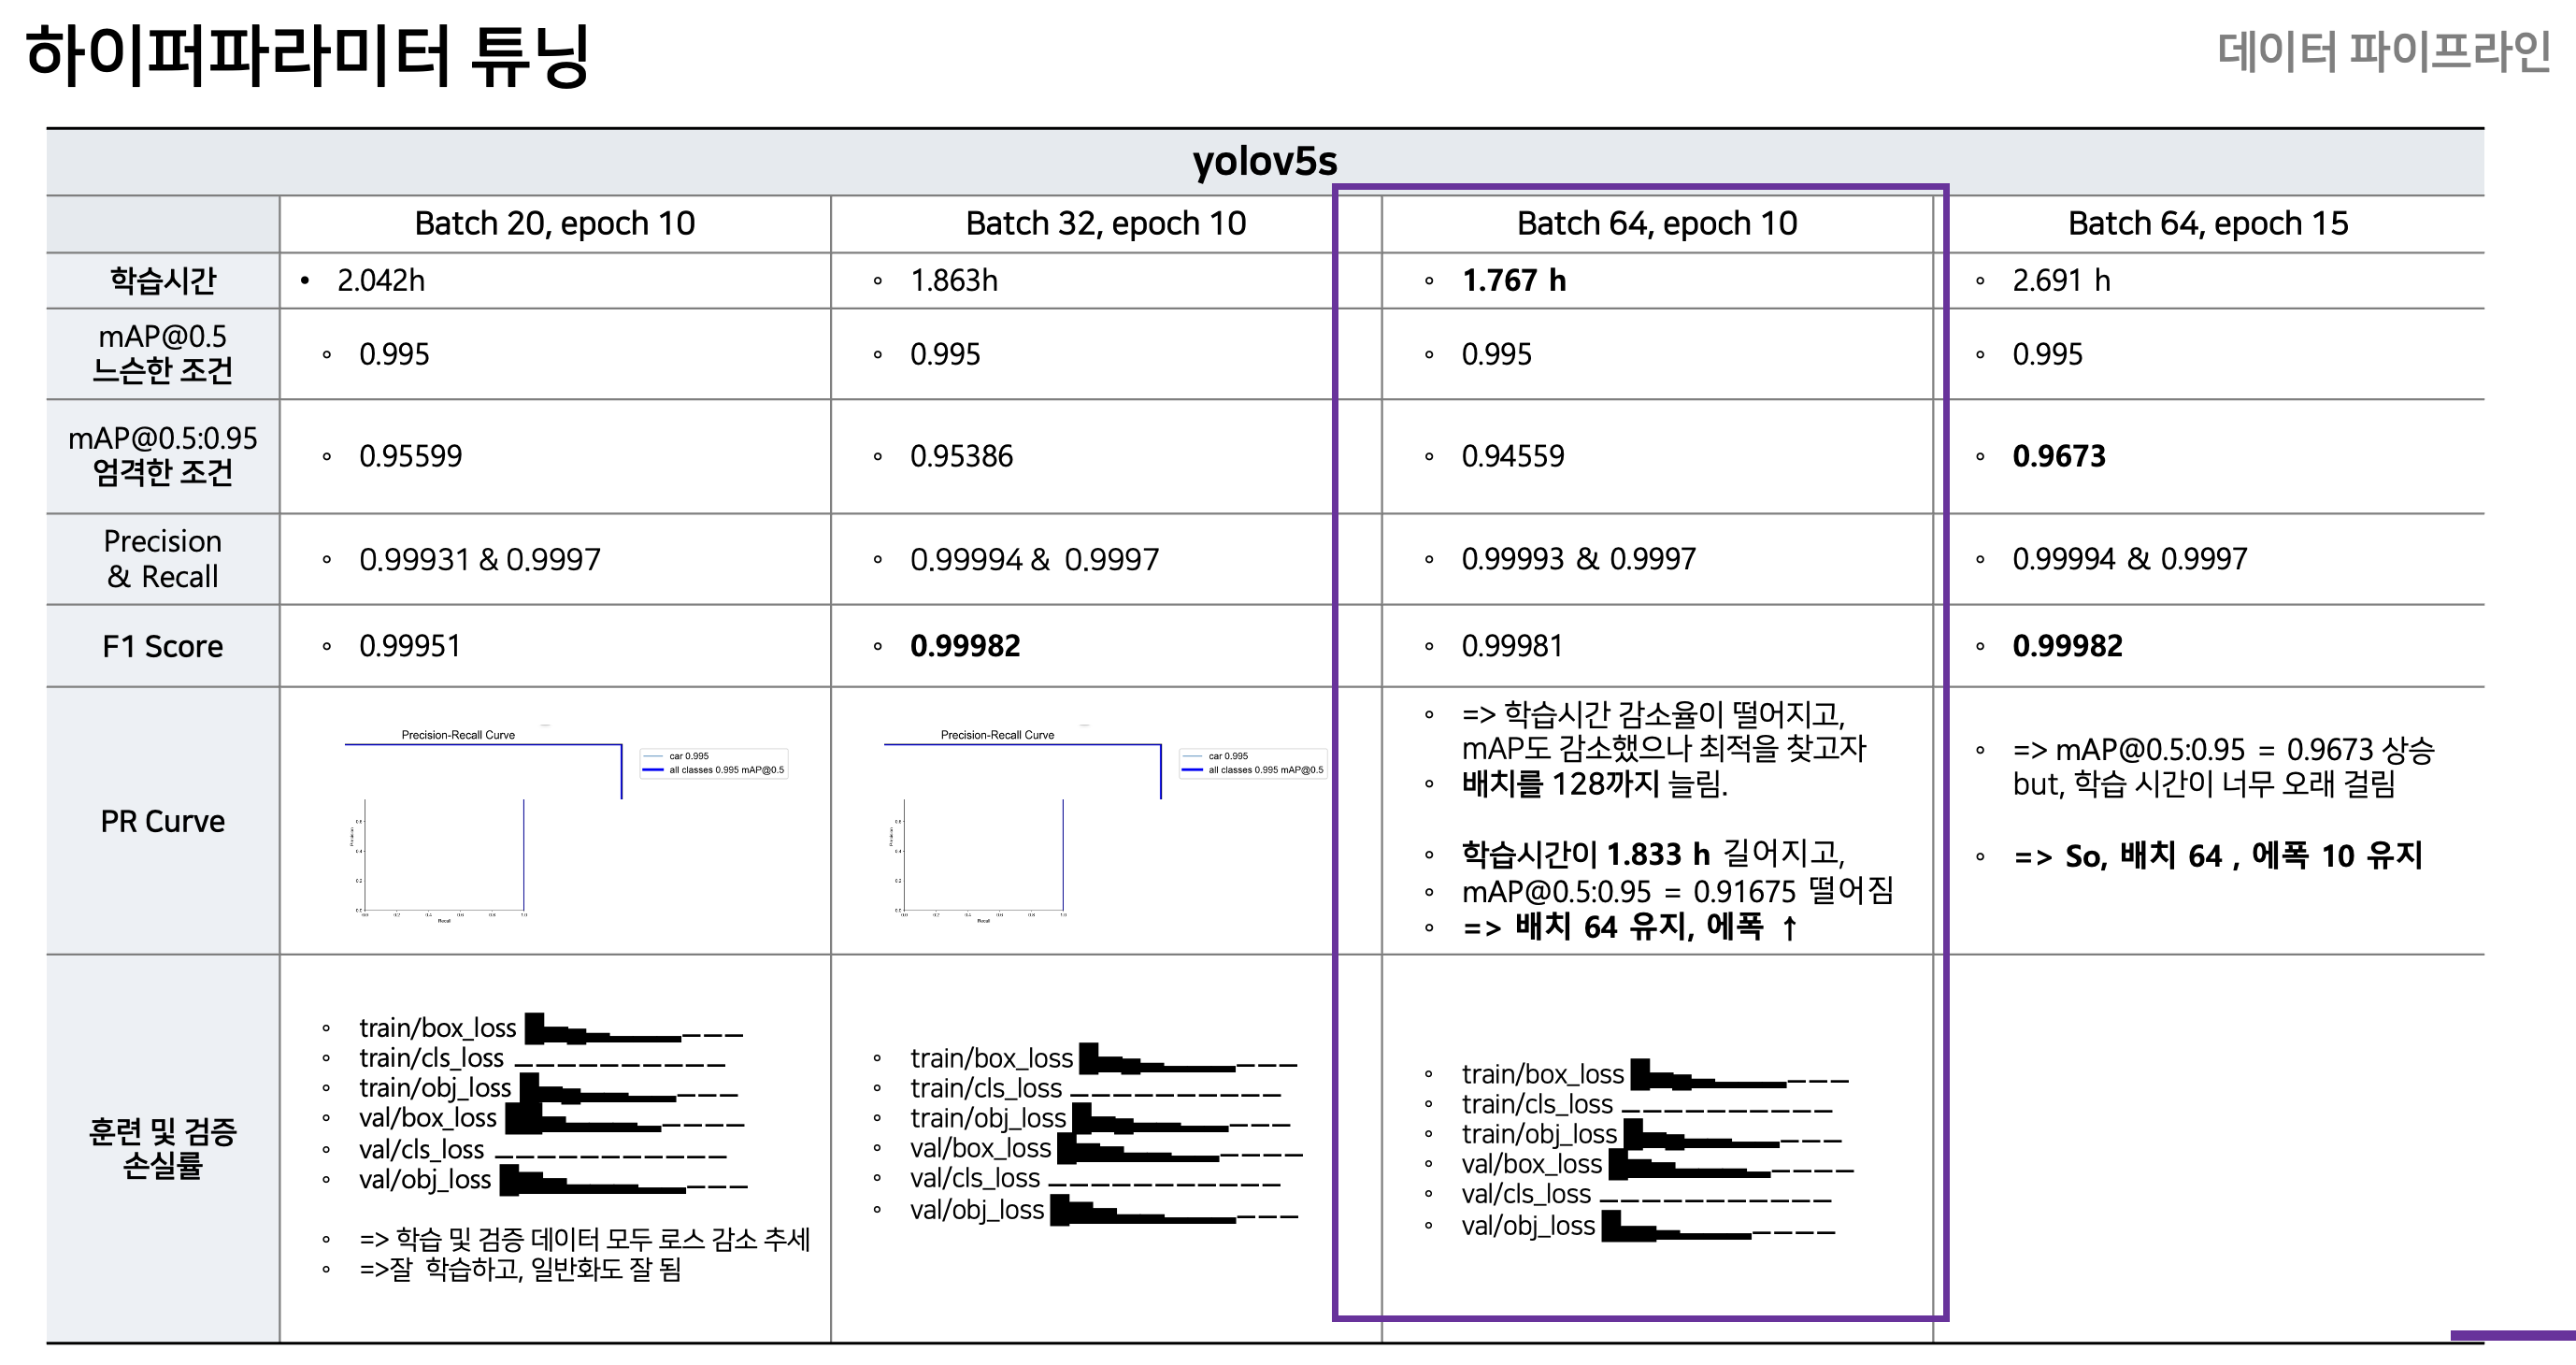
- 배치 64, 에폭 10을 최적으로 판단
#### - Q1. 판단을 하기는 했는데 이렇게 하면 될까요?? 일단 제 노트북이 이것만 하는데도 버거워해서.. 저렇게 한 것도 있습니다. 

In [30]:
import timeit
start = timeit.default_timer()

# 배치 64, 에폭 15 --> 에폭을 늘려서 시도
!python yolov5/train.py --img 224 --batch 64 --epochs 15 --data /Users/tasha/Desktop/comento/dataset/datasets/data.yaml --cfg yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_batch64_epoch15 --patience 5

end = timeit.default_timer()
print(end-start)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: pdy2564 (pdy2564-job-applicants) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=64, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_batch64_epoch15, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, 

### yolo 모델 비교 v8 
- 배치 64, 에폭 10

In [ ]:
import os
#폴더 들어가기

#### Q2. 이게 왜 됐다가 안 됐다가 할까요? cd 명령어가 터미널용이라도 위에서는 됐었는데.. 지금은 안 됩니다 ㅠ

In [ ]:
cd /Users/tasha/Desktop/comento/mywork/models/yolov8

In [ ]:
#os.chdir('/Users/tasha/Desktop/comento/mywork/models/yolov8')

In [50]:
# 경로확인 
print(os.getcwd())

/Users/tasha/Desktop/comento/mywork/models/yolov8


#### yolo 모델학습 v8 
- 배치 64, 에폭 10

In [ ]:
# 울트라틱스 임포트 업그레이드
#!pip install ultralytics --upgrade

In [83]:
from ultralytics import YOLO
import timeit
import wandb

# WandB 초기화
wandb.init(project="yolov8_training", name="yolov8s_batch64_epoch10", sync_tensorboard=True)

# YOLOv8 모델 로드
model = YOLO("yolov8s.pt") 

start = timeit.default_timer()

# YOLOv8 배치 64, 에폭 10, 이어서 학습
model.train(data='/Users/tasha/Desktop/comento/dataset/datasets/data.yaml', 
            epochs=10, batch=64, imgsz=224, name='yolov8s_batch64_epoch10', 
            resume=False, device='mps', verbose=True, val=True,
           save=True) # 중간에 멈출 때만 resume=True, verbose=True로 자세한 결과 확인. # 전체 학습 로그 저장

end = timeit.default_timer()
print(f"Training time: {end - start} seconds")

# # 모델 결과 얻기
# results = model.results  # 결과 객체 가져오기

# # 학습 결과를 WandB에 기록 (확인된 값만 기록)
# wandb.log({
#     "metrics/precision(B)": results.results_dict.get("metrics/precision(B)", None),
#     "metrics/recall(B)": results.results_dict.get("metrics/recall(B)", None),
#     "metrics/mAP50(B)": results.results_dict.get("metrics/mAP50(B)", None),
#     "metrics/mAP50-95(B)": results.results_dict.get("metrics/mAP50-95(B)", None),
#     "fitness": results.results_dict.get("fitness", None)
# })

# # WandB 종료
# wandb.finish()

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 MPS (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=yolov8s_batch64_epoch106, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


TensorBoard: Start with 'tensorboard --logdir runs/detect/yolov8s_batch64_epoch106', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/train.cache
val: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/val.cache... 

Plotting labels to runs/detect/yolov8s_batch64_epoch106/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8s_batch64_epoch106
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      11.4G     0.5111      0.531     0.8124        122        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1      0.692      0.702      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.7G     0.3848     0.2803     0.7841        130        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1      0.743      0.789      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      12.8G      0.366     0.2609      0.782        122        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1      0.724      0.756       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10        13G     0.3601     0.2444     0.7803        130        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      13.2G     0.3192     0.2193     0.7734        129        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      13.3G     0.2926     0.1985      0.774        126        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      13.5G     0.2778     0.1861     0.7698        131        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      13.6G     0.2558     0.1705     0.7657        126        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995       0.99

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      13.7G      0.243     0.1588      0.767        125        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      13.9G     0.2286     0.1465     0.7652        128        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994

10 epochs completed in 1.467 hours.
Optimizer stripped from runs/detect/yolov8s_batch64_epoch106/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_batch64_epoch106/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_batch64_epoch106/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 MPS (Apple M1)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994
Speed: 4.4ms preprocess, 9.3ms inference, 0.0ms loss, 14.6ms postprocess per image
Results saved to runs/detect/yolov8s_batch64_epoch106
Training time: 5374.2375307919865 seconds


#### Q3. 이미 돌린 모델에서 결과만 뽑으려고 했는데 안 되서.. 혹시 한 번 봐주실 수 있을까요? 코드가 이상한 걸까요?

##### 저장된 키를 확인했는데.. 얘네밖에 없고, 이거만 따로 완드비에 추가하니깐.. 아무것도 안뜹니다.. 
- 그런데... 이미 모델을 돌렸으면 확인할 수 있어야 되는 거 아닐까요..? 심지어 폴더에는 있는 것 같더라구요.. png들은.. 근데 값이 안뜹니다..
- csv에도 값이 다 있는데.. 이해가 안 가네요..
- 아래 코드로 임의로 완드에 넣었는데 안됩니다. 굳이 csv로 계산을 .. 다시 하는 것은 너무 비효율적이잖아요.
- 각 배치에 대한 결과만 나오고.. 전체 베스트도 안 보입니다.
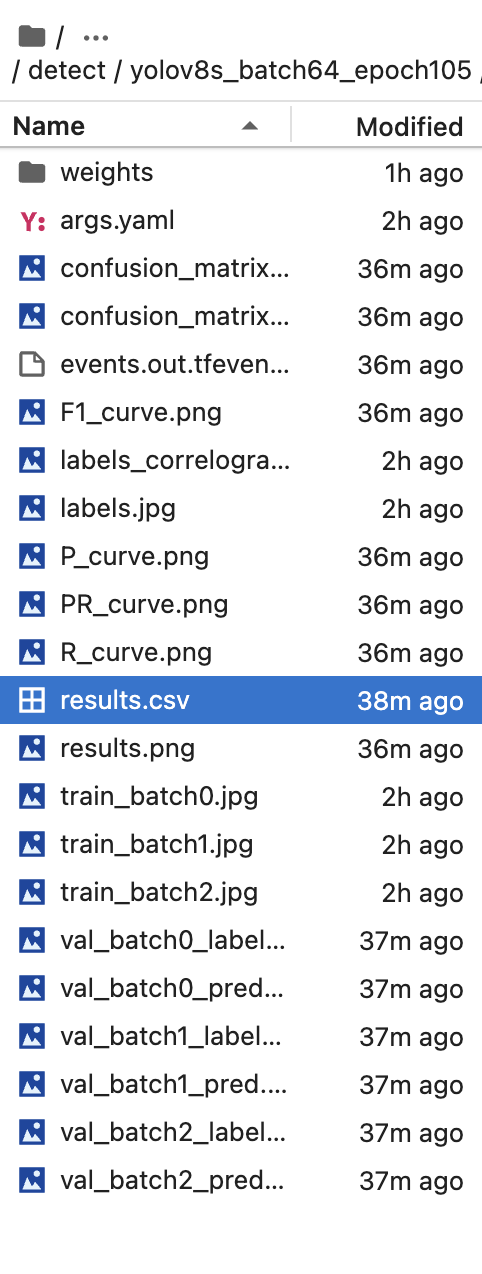
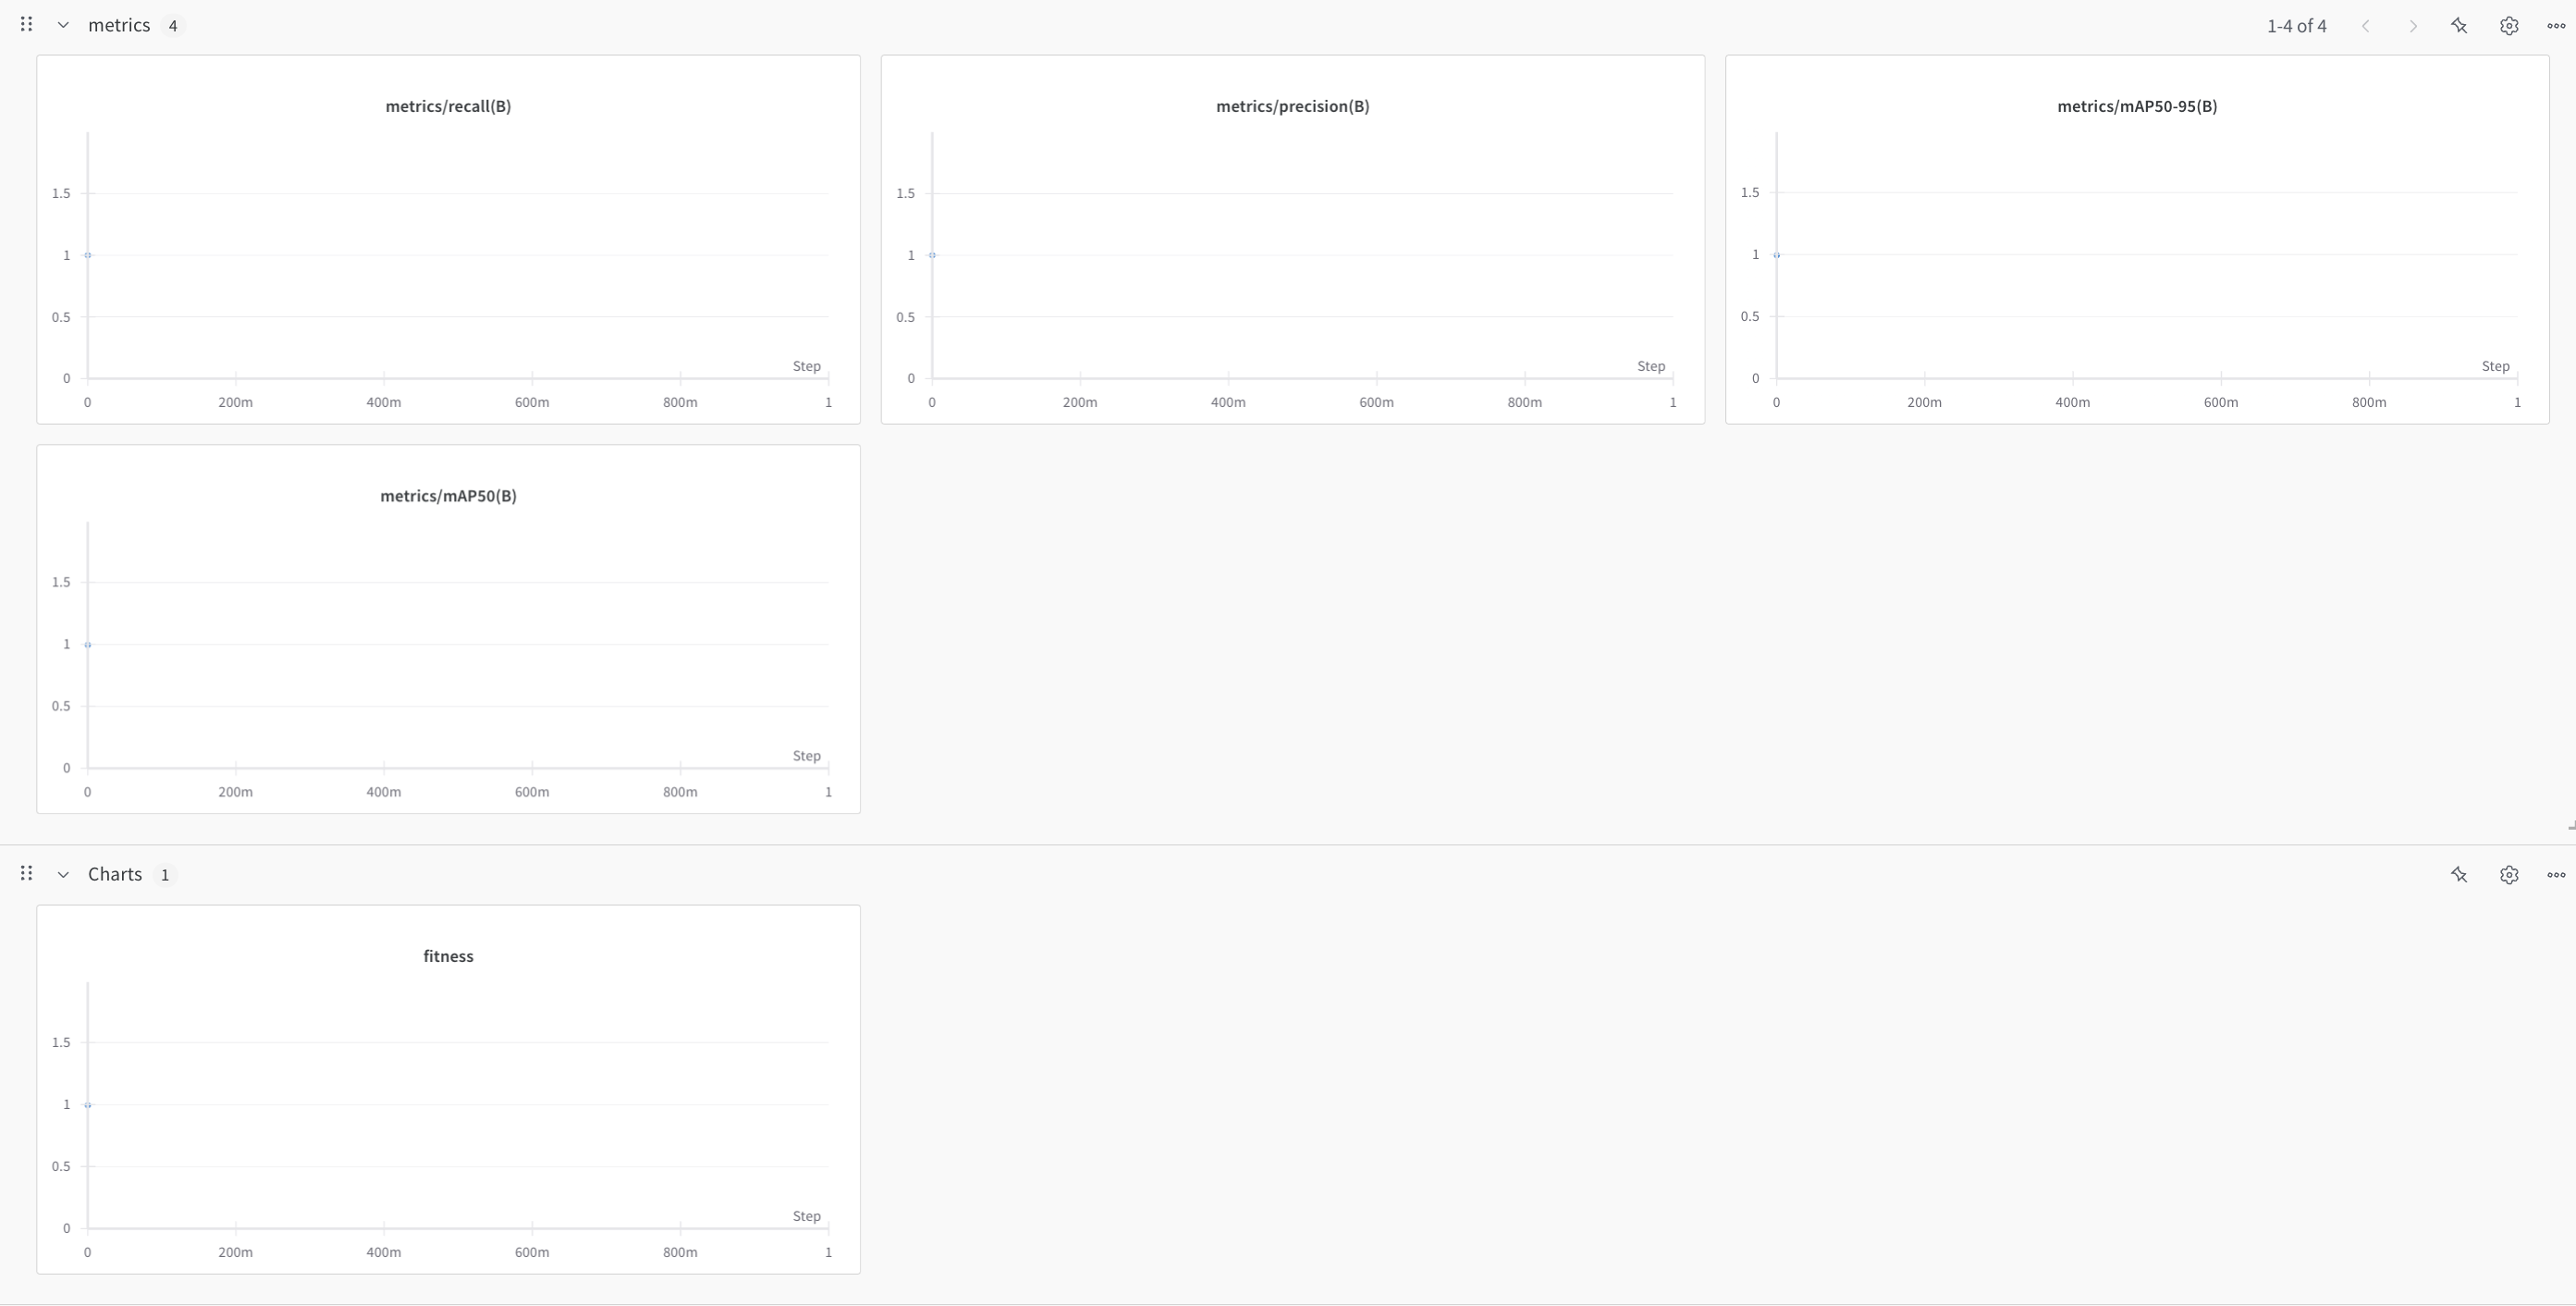

In [76]:
print(results.results_dict.keys())  # 현재 저장된 키 확인

dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [82]:
import wandb

# WandB 초기화
wandb.init(project="yolov8_training")

# results_dict에서 제공된 메트릭을 추출
metrics = results.results_dict  # results 객체에서 추출한 값
precision = metrics.get('metrics/precision(B)', None)
recall = metrics.get('metrics/recall(B)', None)
mAP50 = metrics.get('metrics/mAP50(B)', None)
mAP50_95 = metrics.get('metrics/mAP50-95(B)', None)
fitness = metrics.get('fitness', None)

# WandB에 기록
wandb.log({
    'metrics/precision(B)': precision,
    'metrics/recall(B)': recall,
    'metrics/mAP50(B)': mAP50,
    'metrics/mAP50-95(B)': mAP50_95,
    'fitness': fitness
})

##### yolo5처럼 하는 것-> 안됨

In [68]:
import wandb


# WandB 초기화
wandb.init(project="yolov8_training", name="yolov8s_batch64_epoch10", sync_tensorboard=True)

# 훈련된 모델 로드
from ultralytics import YOLO
model = YOLO("runs/detect/yolov8s_batch64_epoch10/weights/best.pt")  # 이미 훈련된 모델

# 평가 수행
results = model.val()

# 결과에서 메트릭 추출
metrics = results.metrics  # 여기서 metrics는 dictionary 형태로 반환됨

# 메트릭 로그 기록
wandb.log({
    "val/mAP_0.5": metrics["mAP_0.5"],
    "val/mAP_0.5:0.95": metrics["mAP_0.5:0.95"],
    "val/precision": metrics["precision"],
    "val/recall": metrics["recall"],
})

# 학습 결과를 WandB에 기록
wandb.log({
    "train/box_loss": results.results_dict["train/box_loss"][-1],
    "train/cls_loss": results.results_dict["train/cls_loss"][-1],
    "train/dfl_loss": results.results_dict["train/dfl_loss"][-1],
    "val/box_loss": results.results_dict["val/box_loss"][-1],
    "val/cls_loss": results.results_dict["val/cls_loss"][-1],
    "val/dfl_loss": results.results_dict["val/dfl_loss"][-1],
    "metrics/mAP_0.5": results.results_dict["metrics/mAP_0.5"][-1],
    "metrics/mAP_0.5:0.95": results.results_dict["metrics/mAP_0.5:0.95"][-1],
    "metrics/precision": results.results_dict["metrics/precision"][-1],
    "metrics/recall": results.results_dict["metrics/recall"][-1],
})

# WandB 종료
wandb.finish()


Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 CPU (Apple M1)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/val.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994
Speed: 0.1ms preprocess, 78.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val2


AttributeError: 'DetMetrics' object has no attribute 'metrics'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [ ]:
#!tensorboard --logdir runs/detect/yolov8s_batch64_epoch10

### yolo 모델 비교 v11
- 배치 64, 에폭 10

In [84]:
cd /Users/tasha/Desktop/comento/mywork/models/yolov11

/Users/tasha/Desktop/comento/mywork/models/yolov11


In [85]:
# 경로확인 
print(os.getcwd())

/Users/tasha/Desktop/comento/mywork/models/yolov11


In [89]:
# 울트라틱스 임포트 업그레이드
#!pip install ultralytics --upgrade
#!pip install -U ultralytics

In [93]:
from ultralytics import YOLO
import timeit
import wandb

# WandB 초기화
wandb.init(project="yolov11_training", name="yolov11s_batch64_epoch10", sync_tensorboard=True)

# YOLOv11 모델 로드
model = YOLO("yolo11s.pt") 

start = timeit.default_timer()

# YOLOv11 학습 시작
results = model.train(data='/Users/tasha/Desktop/comento/dataset/datasets/data.yaml', 
                      epochs=10, batch=64, imgsz=224, name='yolov11s_batch64_epoch10', 
                      resume=False, device='mps', verbose=True, val=True, save=True)

end = timeit.default_timer()
print(f"Training time: {end - start} seconds")

# 학습 결과를 WandB에 기록 (확인된 값만 기록)
wandb.log({
    "metrics/precision(B)": results.metrics.get("precision", None),
    "metrics/recall(B)": results.metrics.get("recall", None),
    "metrics/mAP50(B)": results.metrics.get("mAP50", None),
    "metrics/mAP50-95(B)": results.metrics.get("mAP50-95", None),
    "fitness": results.fitness if hasattr(results, "fitness") else None
})

# WandB 종료
wandb.finish()


⚠️ Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt...


######################################################################## 100.0%


New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 MPS (Apple M1)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/Users/tasha/Desktop/comento/dataset/datasets/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=yolov11s_batch64_epoch10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


TensorBoard: Start with 'tensorboard --logdir runs/detect/yolov11s_batch64_epoch10', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/train.cache
val: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/val.cache... 

Plotting labels to runs/detect/yolov11s_batch64_epoch10/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/yolov11s_batch64_epoch10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      13.1G     0.4818     0.6312     0.8188        122        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385      0.999     0.0295     0.0305      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      14.3G     0.3666     0.2711     0.7852        130        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1      0.565       0.61      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      14.6G     0.3598     0.2625      0.784        122        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385      0.999       0.12      0.164      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      14.7G     0.3432      0.239     0.7808        130        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      14.9G      0.313     0.2223     0.7745        129        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10        15G     0.2893     0.2006     0.7755        126        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      15.2G     0.2688     0.1851     0.7705        131        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      15.3G     0.2511     0.1708     0.7664        126        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      15.5G     0.2358     0.1583      0.768        125        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      15.6G     0.2224     0.1479     0.7659        128        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994

10 epochs completed in 1.664 hours.
Optimizer stripped from runs/detect/yolov11s_batch64_epoch10/weights/last.pt, 19.1MB
Optimizer stripped from runs/detect/yolov11s_batch64_epoch10/weights/best.pt, 19.1MB

Validating runs/detect/yolov11s_batch64_epoch10/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 MPS (Apple M1)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994
Speed: 4.7ms preprocess, 19.9ms inference, 0.0ms loss, 16.8ms postprocess per image
Results saved to runs/detect/yolov11s_batch64_epoch10
Training time: 6101.65501037502 seconds


AttributeError: 'DetMetrics' object has no attribute 'metrics'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [94]:
# 평가 결과 확인
metrics = model.val()
print(metrics.keys())  # 제공되는 모든 평가 지표 출력


Ultralytics 8.3.92 🚀 Python-3.12.9 torch-2.6.0 MPS (Apple M1)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/tasha/Desktop/comento/dataset/datasets/labels/val.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1296       3385          1          1      0.995      0.994
Speed: 1.0ms preprocess, 10.7ms inference, 0.0ms loss, 17.5ms postprocess per image
Results saved to runs/detect/yolov11s_batch64_epoch102


TypeError: 'list' object is not callable

In [ ]:
# 텐서보드로 학습률 상태 바로 확인 가능 
##!tensorboard --logdir yolov5/runs/train -- 비추천하심

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0 at http://localhost:6006/ (Press CTRL+C to quit)


### 전이학습 결과 확인
- 1주차 과제에서 생성한 testdataset을 기반으로 모델 성능을 평가합니다.

In [ ]:
!python yolov5/val.py --img 224 --batch 60 --data datasets_yolo/datasets.yaml --weights yolov5/runs/train/yolov5s_results/weights/best.pt

val: data=datasets_yolo/datasets.yaml, weights=['yolov5/runs/train/yolov5s_results4/weights/best.pt'], batch_size=60, imgsz=224, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/comento/1/datasets_yolo/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100% 399/399 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:43<00:00,  6.21s/it]
                   all        399       1072          1          1      0.995      0.901
Speed: 0.0ms pre-process, 1.1ms inference, 7.3ms NMS per imag

### 추론(inference) 진행
- 학습에 사용되지 않은 이미지를 한 장씩 넣어서 추론 결과 확인해보기
- 추론 속도와 추론 결과 이미지 확인

In [ ]:
# 필요할 경우 설치
# !pip install ultralytics

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 학습한 모델 불러오기
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/yolov5s_results4/weights/best.pt', source='local')
model.conf = 0.5

YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
# 추론을 진행할 이미지 불러오기
test_img_path = 'Enter inference image path'
img = Image.open(test_img_path)

In [ ]:
# 추론 진행
results = model(img, size=224)

/content/drive/MyDrive/comento/1/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# 추론 결과 확인하기
print(results.pandas().xyxy[0])

# Save or display results
results.show()
plt.imshow(results.render()[0])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.